In [5]:
# Keylia Carter
# Mini Project
# World Health Organization (WHO): Life Expectancy 

In [6]:
########################## Importing packages ##########################
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
######################### DATA CLEANING #########################

# Import df
life = pd.read_csv("/content/Life Expectancy Data.csv") 
life #There are 2938 entries of data with 22 columns
#life.isna().sum() # count number of missing values in each column

df = life.dropna()
#df.isna().sum()
df.shape # we now only have 1649 rows bc we dropped all rows with missing vales

df

# I want to first perform descriptive stats on all the variables
df.describe()




,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [8]:
# renaming variables to get rid of spaces
df.rename(columns = {" BMI " :"BMI", 
                      "Life expectancy ": "Life_expectancy",
                      "Adult Mortality":"Adult_mortality",
                      "infant deaths":"Infant_deaths",
                      "percentage expenditure":"Percentage_expenditure",
                      "Hepatitis B":"HepatitisB",
                      "Measles ":"Measles",
                      "under-five deaths ": "Under_five_deaths",
                      "Total expenditure":"Total_expenditure",
                      "Diphtheria ": "Diphtheria",
                      " thinness  1-19 years":"Thinness_1-19_years",
                      " thinness 5-9 years":"Thinness_5-9_years",
                      " HIV/AIDS":"HIV/AIDS",
                      "Income composition of resources":"Income_composition_of_resources"}, 
          inplace = True)
df.head()

<ipython-input-8-3e39501c0695>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {" BMI " :"BMI",


,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<ipython-input-9-32136b4cdb3d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method='pearson') # pearson is the method used to analyze the stregnth of a relationship between two variables


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'Year'),
  Text(0, 1.5, 'Life_expectancy'),
  Text(0, 2.5, 'Adult_mortality'),
  Text(0, 3.5, 'Infant_deaths'),
  Text(0, 4.5, 'Alcohol'),
  Text(0, 5.5, 'Percentage_expenditure'),
  Text(0, 6.5, 'HepatitisB'),
  Text(0, 7.5, 'Measles'),
  Text(0, 8.5, 'BMI'),
  Text(0, 9.5, 'Under_five_deaths'),
  Text(0, 10.5, 'Polio'),
  Text(0, 11.5, 'Total_expenditure'),
  Text(0, 12.5, 'Diphtheria'),
  Text(0, 13.5, 'HIV/AIDS'),
  Text(0, 14.5, 'GDP'),
  Text(0, 15.5, 'Population'),
  Text(0, 16.5, 'Thinness_1-19_years'),
  Text(0, 17.5, 'Thinness_5-9_years'),
  Text(0, 18.5, 'Income_composition_of_resources'),
  Text(0, 19.5, 'Schooling')])

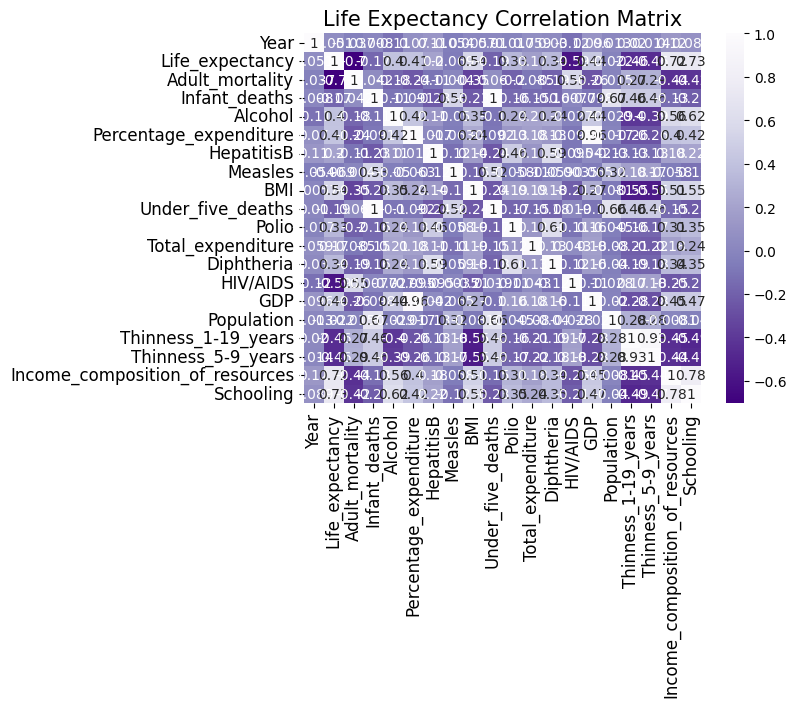

In [9]:
####################### ANALYSIS ####################### 

correlation = df.corr(method='pearson') # pearson is the method used to analyze the stregnth of a relationship between two variables

sns.heatmap(correlation, annot = True, cmap = 'Purples_r')

plt.title('Life Expectancy Correlation Matrix', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


#plt.savefig('save_as_a_png.png')

In [10]:
#df.corr()
Life_expect_corr = df.corr()
Life_expect_corr["Life_expectancy"].sort_values(ascending=False)


<ipython-input-10-354803108070>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Life_expect_corr = df.corr()


Life_expectancy                    1.000000
Schooling                          0.727630
Income_composition_of_resources    0.721083
BMI                                0.542042
GDP                                0.441322
Percentage_expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
HepatitisB                         0.199935
Total_expenditure                  0.174718
Year                               0.050771
Population                        -0.022305
Measles                           -0.068881
Infant_deaths                     -0.169074
Under_five_deaths                 -0.192265
Thinness_5-9_years                -0.457508
Thinness_1-19_years               -0.457838
HIV/AIDS                          -0.592236
Adult_mortality                   -0.702523
Name: Life_expectancy, dtype: float64

<Axes: title={'center': 'Schooling vs. Life Expectancy'}, xlabel='Schooling', ylabel='Life_expectancy'>

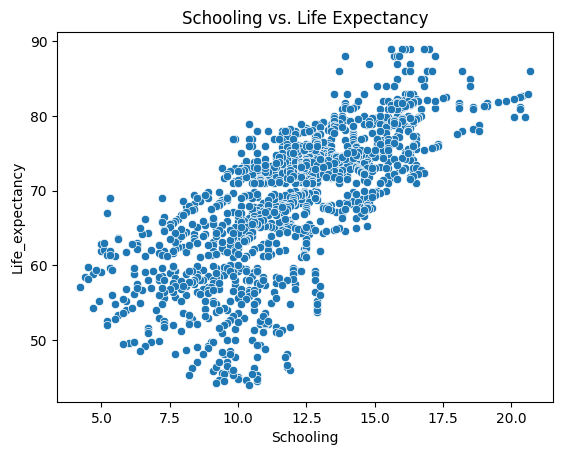

In [11]:
# schooling scatter plot -- showing positive relation
schooling_scat = sns.scatterplot(x="Schooling", y="Life_expectancy", data=df)
schooling_scat.set_title("Schooling vs. Life Expectancy")
schooling_scat.set_xlabel("Schooling")
schooling_scat


<Axes: title={'center': 'Income Composition of Resources vs. Life Expectancy'}, xlabel='Income Comp', ylabel='Life_expectancy'>

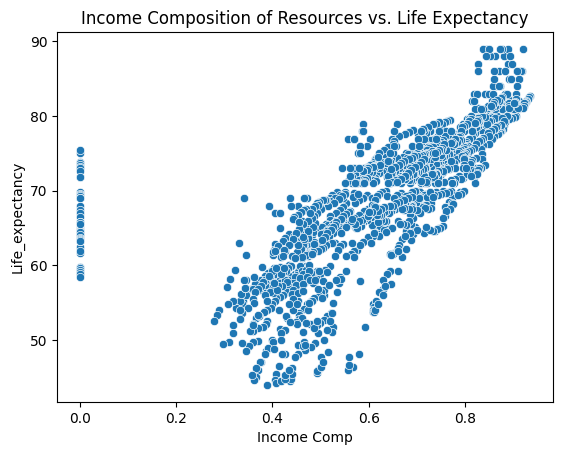

In [12]:
# schooling scatter plot -- showing positive relation
income_scat = sns.scatterplot(x="Income_composition_of_resources", y="Life_expectancy", data=df)
income_scat.set_title("Income Composition of Resources vs. Life Expectancy")
income_scat.set_xlabel("Income Comp")
income_scat


<Axes: title={'center': 'Adult Mortality vs. Life Expectancy'}, xlabel='Adult Mortality', ylabel='Life_expectancy'>

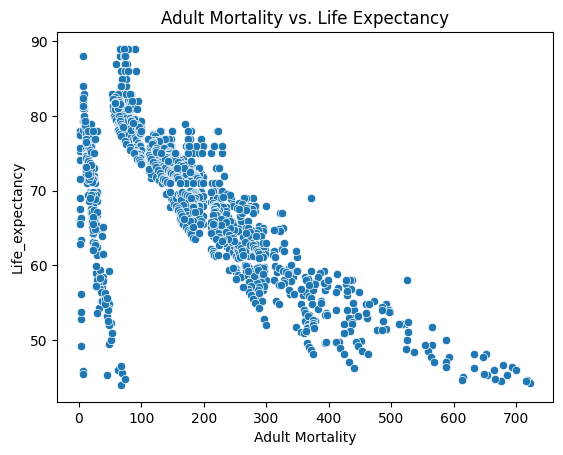

In [13]:
# Adult_mortality scatter plot -- showing negative relationship
adultmort_scat = sns.scatterplot(x="Adult_mortality", y="Life_expectancy", data=df)
adultmort_scat.set_title("Adult Mortality vs. Life Expectancy")
adultmort_scat.set_xlabel("Adult Mortality")
adultmort_scat

<Axes: title={'center': 'HIVAIDS vs. Life Expectancy'}, xlabel='HIV/AIDS', ylabel='Life_expectancy'>

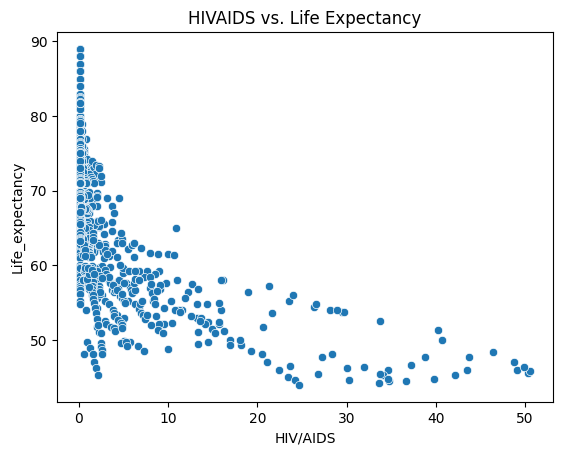

In [14]:
# HIV/AIDS scatter plot -- showing negative relationship
HIVAIDS_scat = sns.scatterplot(x="HIV/AIDS", y="Life_expectancy", data=df)
HIVAIDS_scat.set_title("HIVAIDS vs. Life Expectancy")
HIVAIDS_scat.set_xlabel("HIV/AIDS")
HIVAIDS_scat

Text(0.5, 1.0, 'Life Expectancy Histogram')

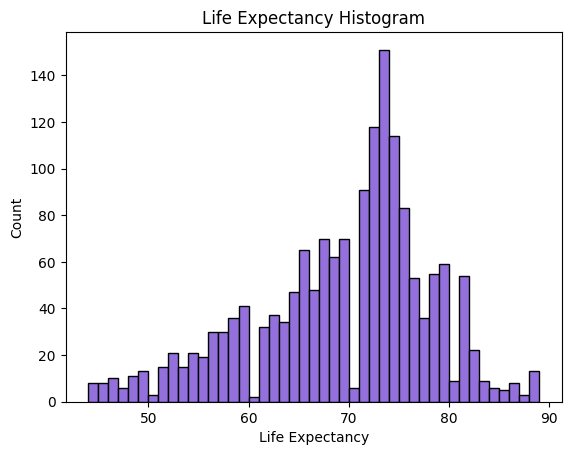

In [15]:
# creating histogram of life expectancy 

plt.hist(df["Life_expectancy"], color='mediumpurple', edgecolor='Black', bins=int(45/1))
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.title('Life Expectancy Histogram')

In [16]:
#  max life expecting by country
df_copy = df

max_life_expe_country = df_copy.groupby('Country', as_index=False).aggregate({'Life_expectancy':'max'}).sort_values('Life_expectancy', ascending=False) 
max_life_expe_country


,Country,Life_expectancy
43,France,89.0
60,Italy,89.0
99,Portugal,89.0
46,Germany,89.0
11,Belgium,89.0
...,...,...
26,Chad,57.0
23,Cameroon,56.7
3,Angola,56.0
108,Sierra Leone,54.0


In [17]:
# min life expectancy by country
min_life_expe_country = df_copy.groupby('Country', as_index=False).aggregate({'Life_expectancy':'min'}).sort_values('Life_expectancy', ascending=True)
min_life_expe_country

,Country,Life_expectancy
73,Malawi,44.0
132,Zimbabwe,44.3
68,Lesotho,44.5
108,Sierra Leone,45.3
114,Swaziland,45.6
...,...,...
24,Canada,79.7
6,Australia,79.9
58,Ireland,81.0
88,Netherlands,81.1


In [18]:
# mean life expectancy per country
life_expe_descr = df_copy.groupby('Country', as_index=False).aggregate({'Life_expectancy':['mean']}).sort_values('Country', ascending=False)
life_expe_descr


,Country,Life_expectancy
,,mean
132,Zimbabwe,49.386667
131,Zambia,57.250000
130,Vanuatu,71.346667
129,Uzbekistan,68.046154
128,Uruguay,76.013333
...,...,...
4,Argentina,75.238462
3,Angola,50.675000
2,Algeria,74.209091


In [19]:
# status and life expectancy mean
status_life_expec = df_copy.groupby('Status', as_index=False).aggregate({'Life_expectancy':['mean']})
status_life_expec


,Status,Life_expectancy
,,mean
0,Developed,78.691736
1,Developing,67.687349


In [20]:
# infant deaths max by country
inf_deaths_country = df_copy.groupby('Country', as_index=False).aggregate({'Infant_deaths':'max'}).sort_values('Infant_deaths', ascending=False) 
inf_deaths_country

,Country,Infant_deaths
55,India,1600
91,Nigeria,556
28,China,490
92,Pakistan,372
9,Bangladesh,196
...,...,...
12,Belize,0
7,Austria,0
103,Samoa,0
104,Sao Tome and Principe,0


In [21]:
# disease focused on HIV/AIDS by country
disease_country = df_copy.groupby('Country', as_index=False).aggregate({'HIV/AIDS': 'max', 'HepatitisB': 'max', 'Measles': 'max'}).sort_values('HIV/AIDS', ascending=True)
disease_country

,Country,HIV/AIDS,HepatitisB,Measles
0,Afghanistan,0.1,68.0,8762
82,Montenegro,0.1,93.0,5
81,Mongolia,0.1,99.0,10677
80,Mexico,0.1,99.0,64
77,Malta,0.1,94.0,6
...,...,...,...,...
110,South Africa,29.7,83.0,12499
68,Lesotho,34.8,96.0,2488
16,Botswana,38.8,95.0,2672
132,Zimbabwe,43.5,97.0,9696
